# Euro Historical Daily Exchange Rates (1999-2020)
This is the intro to my project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
exchange_rates = pd.read_csv('Datasets/euro-daily-hist_1999_2022.csv')
display(exchange_rates.head())
display(exchange_rates.tail())
display(exchange_rates.info())

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2022-06-15,1.5051,1.9558,5.3164,1.3498,1.0435,7.0013,NaN,24.703,7.4392,...,4.9427,NaN,10.6278,1.4519,NaN,NaN,36.5290,18.0465,1.0431,16.7111
1,2022-06-14,1.5174,1.9558,5.3329,1.3522,1.0394,7.0417,NaN,24.749,7.4403,...,4.9443,NaN,10.6220,1.4541,NaN,NaN,36.5660,18.0600,1.0452,16.7959
2,2022-06-13,1.4998,1.9558,5.2785,1.3435,1.0375,7.0434,NaN,24.724,7.4397,...,4.9459,NaN,10.6160,1.4538,NaN,NaN,36.4250,18.0495,1.0455,16.8070
3,2022-06-10,1.4845,1.9558,5.1718,1.3484,1.0404,7.0868,NaN,24.705,7.4389,...,4.9442,NaN,10.5255,1.4620,NaN,NaN,36.7740,18.0116,1.0578,16.5209
4,2022-06-09,1.4985,1.9558,5.2506,1.3506,1.0495,7.1722,NaN,24.689,7.4391,...,4.9453,NaN,10.5045,1.4779,NaN,NaN,37.0790,18.5104,1.0743,16.4132


,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
6063,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
6064,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6065,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6066,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
6067,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6068 non-null   object 
 1   [Australian dollar ]      6068 non-null   object 
 2   [Bulgarian lev ]          5666 non-null   object 
 3   [Brazilian real ]         5800 non-null   object 
 4   [Canadian dollar ]        6068 non-null   object 
 5   [Swiss franc ]            6068 non-null   object 
 6   [Chinese yuan renminbi ]  5800 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6068 non-null   object 
 9   [Danish krone ]           6068 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6068 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6068 non-null   object 
 14  [Croatia

None

## Data Cleaning

In [2]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

## Analysis

In [3]:
euro_to_dollar = exchange_rates[['Time','US_dollar']].copy()
euro_to_dollar['US_dollar'].value_counts()
mask = euro_to_dollar[euro_to_dollar['US_dollar']=='-'].index
euro_to_dollar.drop(labels=mask, axis=0, inplace=True)
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype('float')

<AxesSubplot:xlabel='Time'>

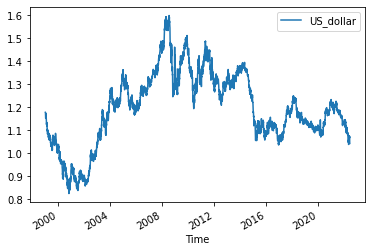

In [4]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar.plot.line('Time','US_dollar')

We want to show whatever similarities and difference exist between the GFC (Great Financial Crisis c. 2008) and the COVID pandemic period. The graphs we want to create are as follows:
* One plot showing the GFC and Pandemic period graphed one on top of the other
* A couple other graphs calling attention to different features of both lines (similarities and differences)

### Let's create some graphs

In [5]:
euro_to_dollar.set_index('Time', inplace=True)
euro_to_dollar

,US_dollar,rolling_mean
Time,,
1999-01-04,1.1789,NaN
1999-01-05,1.1790,NaN
1999-01-06,1.1743,NaN
1999-01-07,1.1632,NaN
1999-01-08,1.1659,NaN
...,...,...
2022-06-09,1.0743,1.060903
2022-06-10,1.0578,1.061030
2022-06-13,1.0455,1.060800


Isolate the slice for the GFC and the COVID pandemic. COVID pandemic was between Feb 3 2020 and Dec 31 2021 (end date is an assumption). The GFC happened between Dec 2007 and June 2009

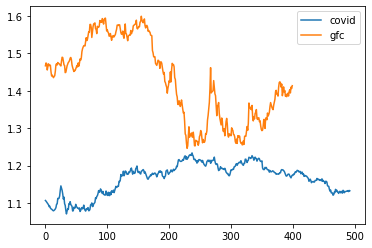

In [6]:
gfc = euro_to_dollar['2007-12-01':'2009-06-30'].reset_index().rename(columns = {'Time':'Time_gfc','US_dollar':'gfc', 'rolling_mean':'rolling_mean_gfc'})
covid = euro_to_dollar['2020-02-03':'2021-12-31'].reset_index().rename(columns = {'Time':'Time_covid','US_dollar':'covid', 'rolling_mean':'rolling_mean_covid'})
# reset indexes so we can plot on the same graph
data = covid.join(gfc)
data.index = list(data.index)
plt.plot(data.index, data['covid'], label='covid')
plt.plot(data[data['gfc'].notna()].index, data.loc[data['gfc'].notna(), 'gfc'], label='gfc')
plt.legend()

**Title**: Great Financial Crisis and the COVID pandemic show different effects on the EUR-USD exchange rate
<br>
**Subtitle**: COVID pandemic had little effect on the EUR-USD exchange rate however the GFC had a noticeable effect on the exchange rate
<br>
Create three plots:
* Plot 1: Graph of COVID era EUR-USD exchange rate
* Plot 2: Graph of GFC era EUR-USD exchange rate
* Plot 3: Overlay of both graphs to highlight similarities and differences

Text(310, 1.63, 'different shapes')

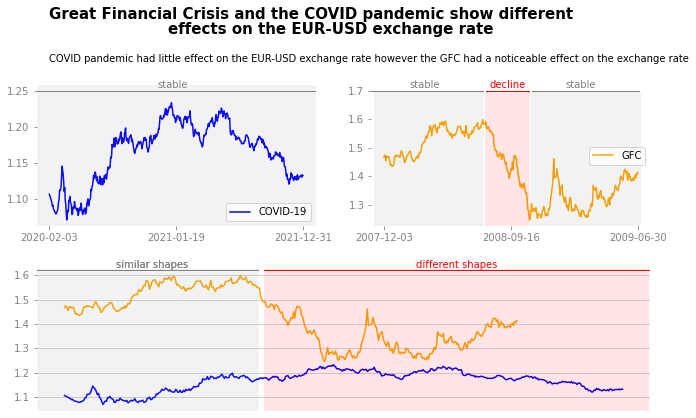

In [266]:
fig = plt.figure(figsize = (11,6), facecolor='white')
[[ax1, ax2], [ax3, ax4]] = fig.subplots(nrows=2, ncols=2)
axs = [[ax1, ax2], [ax3, ax4]]
gs = ax3.get_gridspec()
for ax in axs[1][:]:
    ax.remove()
ax3 = fig.add_subplot(gs[1,:])
axs = [ax1,ax2,ax3]

ax1.plot(data.index, data['covid'], color='blue', label='COVID-19')
ax1_ticks = [0, round(len(data.index)/2), data.index[-1]]
ax1_labels = list(data.loc[ax1_ticks,'Time_covid'])
for i in range(len(ax1_labels)):
    ax1_labels[i] = ax1_labels[i].date() 
ax1.set_xticks(ax1_ticks)
ax1.set_xticklabels(ax1_labels)
ax1.legend()

ax2.plot(data[data['gfc'].notna()].index, data.loc[data['gfc'].notna(), 'gfc'], color='orange', label='GFC')
ax2_ticks = [0, round(len(data[data['gfc'].notna()].index)/2), data[data['gfc'].notna()].index[-1]]
ax2_labels = list(data.loc[ax2_ticks, 'Time_gfc'])
for i in range(len(ax2_labels)):
    ax2_labels[i] = ax2_labels[i].date()
ax2.set_xticks(ax2_ticks)
ax2.set_xticklabels(ax2_labels)
ax2.legend()

ax3.plot(data.index, data['covid'], color='blue')
ax3.plot(data[data['gfc'].notna()].index, data.loc[data['gfc'].notna(), 'gfc'], color='orange')
ax3.set_xticks([])
ax3.grid(True, color='#C9C9C9')

ax1.text(x=0, y=1.35, s='Great Financial Crisis and the COVID pandemic show different', weight='bold', size=15)
ax1.text(x=230, y=1.33, s='effects on the EUR-USD exchange rate', weight='bold', size=15)
ax1.text(x=0, y=1.29, s='COVID pandemic had little effect on the EUR-USD exchange rate however the GFC had a noticeable effect on the exchange rate', size=10)

for ax in axs:
    ax.spines[:].set_visible(False)
    ax.tick_params(color='grey', labelcolor='grey')
    
ax1.axhline(y=1.25, xmin=0, xmax=1, c='grey', linewidth=1)
# ax1.set_facecolor(color='grey')
# ax1.set_alpha(0.1)
ax1.axvline(x=246, ymin=0, ymax=0.00668996812, c='grey', linewidth=280, alpha=0.1)
ax1.text(x=210, y=1.255, s='stable', color='grey')

ax2.axhline(y=1.7, xmin=0, xmax=0.4, c='grey', linewidth=1)
ax2.axvline(x=70, ymin=0, ymax=0.57, c='grey', linewidth=110, alpha=0.1)
ax2.axhline(y=1.7, xmin=0.41, xmax=0.565, c='red', linewidth=1)
ax2.axvline(x=193, ymin=0, ymax=0.79, c='red', linewidth=45, alpha=0.1)
ax2.axhline(y=1.7, xmin=0.575, xmax=0.96, c='grey', linewidth=1)
ax2.axvline(x=317, ymin=0, ymax=0.56, c='grey', linewidth=110, alpha=0.1)
ax2.text(x=40, y=1.71, s='stable', color='grey')
ax2.text(x=166, y=1.71, s='decline', color='red')
ax2.text(x=285, y=1.71, s='stable', color='grey')

ax3.axhline(y=1.62, xmin=0, xmax=0.36, color='grey', linewidth=1)
ax3.axvline(x=70, ymin=0, ymax=1.62, color='grey', linewidth=230, alpha=0.1)
ax3.text(x=45, y=1.63, s='similar shapes', color='grey')
fig.subplots_adjust(hspace=0.3)
ax3.axhline(y=1.62, xmin=0.37, xmax=1, color='red', linewidth=1)
ax3.axvline(x=345, ymin=0, ymax=1.62, color='red', linewidth=385, alpha=0.1)
ax3.text(x=45, y=1.63, s='similar shapes', color='grey')
ax3.text(x=310, y=1.63, s='different shapes', color='red')

Overall, looks like the EUR-USD exhcange rate behavior during these two economic events (GFC and COVID-19 pandemic) start out similarly but then diverge. In the case of COVID, the exchange rate probably didn't change very much since this was a global event that affected all countries. However the GFC is known to have affected the US substantially (while leaving out other countries to some degree), which would explain the decline in the EUR-USD exchange rate during the GFC.